In [1]:
'''
Creating to run Model D Conv1d_mfcc13
different layer system
full mfcc 13 features
Created on 2020.12.11
Label: Emotion

'''
# libraries
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.layers import Activation, BatchNormalization
from tensorflow.keras.layers import Conv1D, Conv2D, LSTM
from tensorflow.keras.layers import AveragePooling1D, GlobalAveragePooling2D, MaxPooling1D
from tensorflow.keras.models import Model, model_from_json, Sequential

# added this to plot
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report



In [2]:
# load datasets

# assigning the pickle files
with open('./Data_Array_Storage/X_train_mfcc13_axis0_emo.pkl', 'rb') as f:
    X_train = pickle.load(f)

with open('./Data_Array_Storage/X_test_mfcc13_axis0_emo.pkl', 'rb') as f:
    X_test = pickle.load(f)

with open('./Data_Array_Storage/y_train_mfcc13_axis0_emo.pkl', 'rb') as f:
    y_train = pickle.load(f)

with open('./Data_Array_Storage/y_test_mfcc13_axis0_emo.pkl', 'rb') as f:
    y_test = pickle.load(f)
    
print('dataset loaded')

dataset loaded


In [3]:
# input shape
input_shape = (X_train.shape[1], X_train.shape[2])
print(input_shape)

(216, 13)


In [17]:
def model_d_conv1d(input_shape):
    model = Sequential()
    model.add(Conv1D(32, 3, padding='same',input_shape=input_shape))  # X_train.shape[1] = No. of Columns (216)
    model.add(Activation('relu'))
    model.add(Conv1D(32, 3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(MaxPooling1D(pool_size=(3)))
    model.add(Conv1D(64, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(64, 3, padding='same'))
    model.add(Dropout(0.25))
    model.add(MaxPooling1D(pool_size=(3))) # added drop out and maxpooling layer on 20201209 at 1330
    model.add(Activation('relu'))
    model.add(Conv1D(64, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(64, 3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(MaxPooling1D(pool_size=(3)))
    model.add(Conv1D(128, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(256, 3, padding='same'))
    model.add(Activation('relu'))
#     model.add(LSTM(64))
    model.add(Flatten())
    model.add(Dense(7)) # Target class number
    model.add(Activation('softmax'))
    
    # model optimizer
#     model = model_d_conv1d(input_shape)
    optimizer = tf.keras.optimizers.RMSprop(lr=0.000001, decay=1e-6)
    
    # compile model
    model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

    return model

In [4]:
def model_d_conv1d_flip(input_shape):
    model = Sequential()
    model.add(Conv1D(256, 3, padding='same',input_shape=input_shape))  # X_train.shape[1] = No. of Columns (216)
    model.add(Activation('relu'))
    model.add(Conv1D(256, 3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(MaxPooling1D(pool_size=(3)))
    model.add(Conv1D(128, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 3, padding='same'))
    model.add(Dropout(0.25))
    model.add(MaxPooling1D(pool_size=(3))) # added drop out and maxpooling layer on 20201209 at 1330
    model.add(Activation('relu'))
    model.add(Conv1D(128, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(MaxPooling1D(pool_size=(3)))
    model.add(Conv1D(64, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(64, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(32, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(3)) # Target class number
    model.add(Activation('softmax'))
    
    # model optimizer
#     model = model_d_conv1d(input_shape)
    optimizer = tf.keras.optimizers.RMSprop(lr=0.000001, decay=1e-6)
    
    # compile model
    model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

    return model

In [18]:
# load model and input shape
# from models import model_d_conv1d

# model = model_d_conv1d_flip(input_shape)
model = model_d_conv1d(input_shape)
# optimizer = tf.keras.optimizers.RMSprop(lr=0.000001, decay=1e-6)

print('input shape, model, optimizer loaded')

model.summary()

input shape, model, optimizer loaded
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 216, 32)           1280      
_________________________________________________________________
activation_10 (Activation)   (None, 216, 32)           0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 216, 32)           3104      
_________________________________________________________________
batch_normalization_2 (Batch (None, 216, 32)           128       
_________________________________________________________________
activation_11 (Activation)   (None, 216, 32)           0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 216, 32)           0         
_________________________________________________________________
max_pooling1d_3 (

In [19]:
# callback list: ModelCheckpoint, reduceLROnPlat, EarlyStopping
# checkpoint_path = "./models_saved/model_d_conv1d_v3.h5"

checkpoint_path = "./models_saved/model_d_conv1d_mfcc13_emo.h5"

# Create a callback that saves the model's weights
callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=False,
                                                 save_best_only=True,
                                                 verbose=1), # 1 tells your which epoch is saving
#                                                  monitor='val_categorical_accuracy',  # added for emo1d
#                                                  mode='max'), # added for emo1d
               tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', # changed from 'val_accuracy', 'val_loss'
                                                patience=5, 
                                                restore_best_weights=True),
#                                                 verbose = 1, # added verbose for emo1d
#                                                 mode = 'min'), # added for emo1d
               tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                                    patience=2, 
                                                    factor=0.5, 
                                                    min_lr=0.000001, 
                                                    verbose=1)]

print('callbacks and checkpoints set')

callbacks and checkpoints set


In [20]:
batch_size = 64

model_history=model.fit(X_train, 
                        y_train,
                        batch_size=batch_size,
                        epochs=150,
                        validation_data=(X_test, y_test),
                        verbose=2,
                        callbacks=callbacks)

Epoch 1/150

Epoch 00001: val_loss improved from inf to 1.94014, saving model to ./models_saved/model_d_conv1d_mfcc13_emo.h5
305/305 - 9s - loss: 1.9926 - accuracy: 0.1631 - val_loss: 1.9401 - val_accuracy: 0.1704
Epoch 2/150

Epoch 00002: val_loss improved from 1.94014 to 1.92951, saving model to ./models_saved/model_d_conv1d_mfcc13_emo.h5
305/305 - 10s - loss: 1.9506 - accuracy: 0.1720 - val_loss: 1.9295 - val_accuracy: 0.1762
Epoch 3/150

Epoch 00003: val_loss improved from 1.92951 to 1.91996, saving model to ./models_saved/model_d_conv1d_mfcc13_emo.h5
305/305 - 9s - loss: 1.9244 - accuracy: 0.1869 - val_loss: 1.9200 - val_accuracy: 0.1786
Epoch 4/150

Epoch 00004: val_loss improved from 1.91996 to 1.91222, saving model to ./models_saved/model_d_conv1d_mfcc13_emo.h5
305/305 - 10s - loss: 1.9104 - accuracy: 0.1921 - val_loss: 1.9122 - val_accuracy: 0.1891
Epoch 5/150

Epoch 00005: val_loss improved from 1.91222 to 1.90535, saving model to ./models_saved/model_d_conv1d_mfcc13_emo.h5
3

Epoch 39/150

Epoch 00039: val_loss improved from 1.68648 to 1.68298, saving model to ./models_saved/model_d_conv1d_mfcc13_emo.h5
305/305 - 11s - loss: 1.5689 - accuracy: 0.3892 - val_loss: 1.6830 - val_accuracy: 0.3359
Epoch 40/150

Epoch 00040: val_loss improved from 1.68298 to 1.67845, saving model to ./models_saved/model_d_conv1d_mfcc13_emo.h5
305/305 - 11s - loss: 1.5629 - accuracy: 0.3935 - val_loss: 1.6784 - val_accuracy: 0.3355
Epoch 41/150

Epoch 00041: val_loss improved from 1.67845 to 1.67614, saving model to ./models_saved/model_d_conv1d_mfcc13_emo.h5
305/305 - 11s - loss: 1.5594 - accuracy: 0.3917 - val_loss: 1.6761 - val_accuracy: 0.3373
Epoch 42/150

Epoch 00042: val_loss improved from 1.67614 to 1.67508, saving model to ./models_saved/model_d_conv1d_mfcc13_emo.h5
305/305 - 10s - loss: 1.5521 - accuracy: 0.3953 - val_loss: 1.6751 - val_accuracy: 0.3371
Epoch 43/150

Epoch 00043: val_loss improved from 1.67508 to 1.66968, saving model to ./models_saved/model_d_conv1d_mfcc

Epoch 79/150

Epoch 00079: val_loss did not improve from 1.60377
305/305 - 18s - loss: 1.4263 - accuracy: 0.4455 - val_loss: 1.6080 - val_accuracy: 0.3634
Epoch 80/150

Epoch 00080: val_loss did not improve from 1.60377
305/305 - 17s - loss: 1.4191 - accuracy: 0.4532 - val_loss: 1.6071 - val_accuracy: 0.3624
Epoch 81/150

Epoch 00081: val_loss did not improve from 1.60377
305/305 - 17s - loss: 1.4191 - accuracy: 0.4526 - val_loss: 1.6043 - val_accuracy: 0.3632
Epoch 82/150

Epoch 00082: val_loss improved from 1.60377 to 1.60188, saving model to ./models_saved/model_d_conv1d_mfcc13_emo.h5
305/305 - 19s - loss: 1.4184 - accuracy: 0.4464 - val_loss: 1.6019 - val_accuracy: 0.3646
Epoch 83/150

Epoch 00083: val_loss did not improve from 1.60188
305/305 - 18s - loss: 1.4174 - accuracy: 0.4563 - val_loss: 1.6028 - val_accuracy: 0.3628


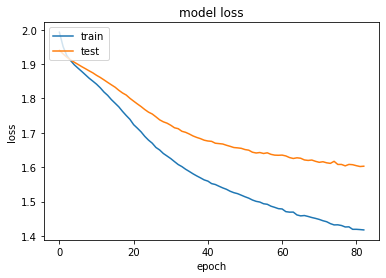

In [21]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
score,acc = model.evaluate(X_test, y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

77/77 - 1s - loss: 1.6038 - accuracy: 0.3663
score: 1.60
acc: 0.37


In [23]:
# load labels
with open('./Data_Array_Storage/labels_mfcc13_axis0_emo.pkl', 'rb') as f:
    lb = pickle.load(f)

In [25]:
# error analysis

preds = model.predict(X_test, 
                         batch_size=batch_size, 
                         verbose=1)

preds=preds.argmax(axis=1)
preds

77/77 [==============================] - 1s 8ms/step


array([5, 4, 5, ..., 1, 1, 5])

In [26]:
# predictions 
preds = preds.astype(int).flatten()
preds = (lb.inverse_transform((preds)))
preds = pd.DataFrame({'predictedvalues': preds})

# Actual labels
actual = y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'actualvalues': actual})

# Lets combined both of them into a single dataframe
finaldf = actual.join(preds)
finaldf[150:180]

,actualvalues,predictedvalues
150,sad,sad
151,disgust,sad
152,angry,angry
153,disgust,fear
154,neutral,neutral
155,disgust,disgust
156,disgust,disgust
157,fear,sad
158,angry,neutral
159,disgust,sad


In [27]:
# the confusion matrix heat map plot
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

0.36628982528263104


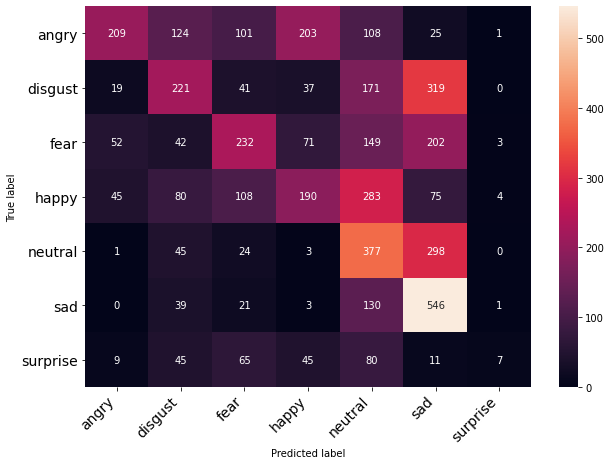

In [28]:
# Get the predictions file 
# finaldf = pd.read_csv("Predictions.csv")
classes = finaldf.actualvalues.unique()
classes.sort()    

# Confusion matrix 
c = confusion_matrix(finaldf.actualvalues, finaldf.predictedvalues)
print(accuracy_score(finaldf.actualvalues, finaldf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [29]:
# Classification report 
classes = finaldf.actualvalues.unique()
classes.sort()    
print(classification_report(finaldf.actualvalues, finaldf.predictedvalues, target_names=classes))

              precision    recall  f1-score   support

       angry       0.62      0.27      0.38       771
     disgust       0.37      0.27      0.31       808
        fear       0.39      0.31      0.35       751
       happy       0.34      0.24      0.28       785
     neutral       0.29      0.50      0.37       748
         sad       0.37      0.74      0.49       740
    surprise       0.44      0.03      0.05       262

    accuracy                           0.37      4865
   macro avg       0.40      0.34      0.32      4865
weighted avg       0.40      0.37      0.35      4865

